In [1]:
import xarray as xr
import ndpyramid

In [2]:
store1 = f's3://carbonplan-data-viewer/demo/ScenarioMIP.CCCma.CanESM5.ssp245.r1i1p1f1.day.GARD-SV.tasmax.zarr'
store2 = (
    f's3://carbonplan-data-viewer/demo/ScenarioMIP.CCCma.CanESM5.ssp245.r1i1p1f1.day.tasmax.zarr'
)
ds1 = xr.open_dataset(store1, engine='zarr', chunks={}).chunk({'lat': -1, 'lon': -1})
ds2 = xr.open_dataset(store2, engine='zarr', chunks={})
ds1

<xarray.Dataset>
Dimensions:  (lat: 721, lon: 1440, time: 300)
Coordinates:
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-10-27
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(30, 721, 1440), meta=np.ndarray>
Attributes: (12/17)
    Conventions:                     CF-1.8
    activity_id:                     ScenarioMIP
    cmip6_downscaling_contact:       hello@carbonplan.org
    cmip6_downscaling_explainer:     https://carbonplan.org/research/cmip6-do...
    cmip6_downscaling_institution:   CarbonPlan
    cmip6_downscaling_license:       CC-BY-4.0
    ...                              ...
    institution_id:                  CCCma
    member_id:                       r1i1p1f1
    references:                      Eyring, V., Bony, S., Meehl, G. A., Seni...
    source_id:                       CanESM5
    timescale:                       day
    variable_id:                     tasmax

In [3]:
ds2

<xarray.Dataset>
Dimensions:    (lat: 64, bnds: 2, lon: 128, time: 300)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(64, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
  * time       (time) object 2015-01-01 12:00:00 ... 2015-10-27 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(300, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tasmax     (time, lat, lon) float32 dask.array<chunksize=(30, 64, 128), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            1f91f92cb6d607391f44831504025d32fc44faa1
    CCCma_parent_runid:          rc3.1-his01
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-s4501
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/3e6a08d9-8d41-4c27-9da2-7217d9e...
    variable_id:                 tasmax
    variant_label:               r1i1p1f1
    version:                     v20190429
    version_id:                  v20190429

In [4]:
%%time
dt1 = ndpyramid.regrid.pyramid_regrid(ds1, levels=1, projection='web-mercator')

CPU times: user 14.8 s, sys: 487 ms, total: 15.3 s
Wall time: 15.3 s


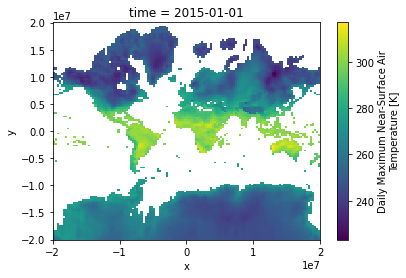

In [5]:
dt1['0'].ds.tasmax.isel(time=0).plot()

In [6]:
%%time
dt2 = ndpyramid.regrid.pyramid_regrid(ds1, levels=3, projection='equidistant-cylindrical')

CPU times: user 52.9 s, sys: 693 ms, total: 53.6 s
Wall time: 53.4 s


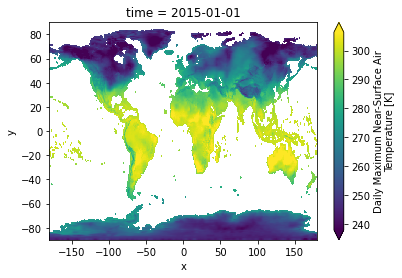

In [7]:
dt2['2'].ds.tasmax.isel(time=0).plot(robust=True)

In [11]:
import datatree

dt = datatree.open_datatree(
    's3://carbonplan-data-viewer/demo/ScenarioMIP.CCCma.CanESM5.ssp245.r1i1p1f1.day.GARD-SV.pyramid.tasmax.zarr',
    engine='zarr',
    chunks={},
)
dt

/srv/conda/envs/notebook/lib/python3.9/site-packages/datatree/io.py:88: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = open_dataset(store, engine="zarr", **kwargs)
/srv/conda/envs/notebook/lib/python3.9/site-packages/datatree/io.py:92: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolida

DataTree('None', parent=None)
│   Dimensions:  ()
│   Data variables:
│       *empty*
│   Attributes:
│       multiscales:  [{'datasets': [{'path': '0', 'pixels_per_tile': 128}, {'pat...
│       title:        multiscale data pyramid
│       version:      0.0.7.post1+gad0f0f4
├── DataTree('0')
│       Dimensions:  (time: 300, y: 128, x: 128)
│       Coordinates:
│         * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-10-27
│         * x        (x) float32 -178.6 -175.8 -173.0 -170.2 ... 170.2 173.0 175.8 178.6
│         * y        (y) float32 89.3 87.89 86.48 85.08 ... -85.08 -86.48 -87.89 -89.3
│       Data variables:
│           tasmax   (time, y, x) float32 dask.array<chunksize=(30, 128, 128), meta=np.ndarray>
│       Attributes: (12/18)
│           Conventions:                     CF-1.8
│           activity_id:                     ScenarioMIP
│           cmip6_downscaling_contact:       hello@carbonplan.org
│           cmip6_downscaling_explainer:     https://carbonplan.org/research/cmip6-do...
│           cmip6_downscaling_institution:   CarbonPlan
│           cmip6_downscaling_license:       CC-BY-4.0
│           ...                              ...
│           member_id:                       r1i1p1f1
│           references:                      Eyring, V., Bony, S., Meehl, G. A., Seni...
│           regrid_method:                   bilinear
│           source_id:                       CanESM5
│           timescale:                       day
│           variable_id:                     tasmax
├── DataTree('1')
│       Dimensions:  (time: 300, y: 256, x: 256)
│       Coordinates:
│         * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-10-27
│         * x        (x) float32 -179.3 -177.9 -176.5 -175.1 ... 175.1 176.5 177.9 179.3
│         * y        (y) float32 89.65 88.95 88.24 87.54 ... -87.54 -88.24 -88.95 -89.65
│       Data variables:
│           tasmax   (time, y, x) float32 dask.array<chunksize=(30, 128, 128), meta=np.ndarray>
│       Attributes: (12/18)
│           Conventions:                     CF-1.8
│           activity_id:                     ScenarioMIP
│           cmip6_downscaling_contact:       hello@carbonplan.org
│           cmip6_downscaling_explainer:     https://carbonplan.org/research/cmip6-do...
│           cmip6_downscaling_institution:   CarbonPlan
│           cmip6_downscaling_license:       CC-BY-4.0
│           ...                              ...
│           member_id:                       r1i1p1f1
│           references:                      Eyring, V., Bony, S., Meehl, G. A., Seni...
│           regrid_method:                   bilinear
│           source_id:                       CanESM5
│           timescale:                       day
│           variable_id:                     tasmax
└── DataTree('2')
        Dimensions:  (time: 300, y: 512, x: 512)
        Coordinates:
          * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-10-27
          * x        (x) float32 -179.6 -178.9 -178.2 -177.5 ... 177.5 178.2 178.9 179.6
          * y        (y) float32 89.82 89.47 89.12 88.77 ... -88.77 -89.12 -89.47 -89.82
        Data variables:
            tasmax   (time, y, x) float32 dask.array<chunksize=(30, 128, 128), meta=np.ndarray>
        Attributes: (12/18)
            Conventions:                     CF-1.8
            activity_id:                     ScenarioMIP
            cmip6_downscaling_contact:       hello@carbonplan.org
            cmip6_downscaling_explainer:     https://carbonplan.org/research/cmip6-do...
            cmip6_downscaling_institution:   CarbonPlan
            cmip6_downscaling_license:       CC-BY-4.0
            ...                              ...
            member_id:                       r1i1p1f1
            references:                      Eyring, V., Bony, S., Meehl, G. A., Seni...
            regrid_method:                   bilinear
            source_id:                       CanESM5
            timescal

In [8]:
dt2.to_zarr(
    's3://carbonplan-data-viewer/demo/ScenarioMIP.CCCma.CanESM5.ssp245.r1i1p1f1.day.GARD-SV.pyramid.tasmax.zarr',
    consolidated=True,
    mode='w',
)

ReadOnlyError: object is read-only

In [13]:
# store = zarr.open_consolidated('s3://carbonplan-data-viewer/demo/ScenarioMIP.CCCma.CanESM5.ssp245.r1i1p1f1.day.GARD-SV.pyramid.tasmax.zarr')
# store

<zarr.hierarchy.Group '/'>

In [14]:
store.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.ConsolidatedMetadataStore
Chunk store type,zarr.storage.FSStore
No. members,3
No. arrays,0
No. groups,3
Groups,"0, 1, 2"


In [18]:
store[0].tasmax.info

Name,/0/tasmax
Type,zarr.core.Array
Data type,float32
Shape,"(450, 128, 128)"
Chunk shape,"(30, 128, 128)"
Order,C
Read-only,False
Compressor,Zlib(level=1)
Store type,zarr.storage.ConsolidatedMetadataStore
Chunk store type,zarr.storage.FSStore
No. bytes,29491200 (28.1M)
